In [6]:
import os 
#os.chdir('/home/clchupin1/IA_chupin/bench_all')
from utils_lib.utils import Utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from itertools import cycle
cycol = cycle('bgrcmk')
utils = Utils()

In [7]:



def get_path(policie_name,env_name,fe_k,fev_l,index=0):
    global util
    #util.all_feature_extractor[]
    return os.path.join(os.getcwd(), ("./result/log_json/" +
    policie_name+ "/" +
    env_name+"/"+
    utils.all_feature_extractor[fe_k]["name"] + "_v" +
    str(utils.all_feature_extractor[fe_k]["order"][fev_l]) + "_i" +
    str(index) +".json"
    ))
def get_plot_array(path_log):
    data = []
    time = []
    with open(path_log, 'r') as fd:
        lines = fd.read().split('\n')
        for l in lines:
            split_array=l.split(",")
            if len(split_array)==5:
                #print(len(split_array))
                time.append(float(split_array[0]))
                data.append(float(split_array[2]))

    data = np.array(data)
    time = np.array(time)
    return data,time
def plot_array(data,error,time,plot_target,label_plot,color,marker):
    if color ==None:
        color=next(cycol)
        while color=="k":
            color=next(cycol)
    if hasattr(data, "__len__"):#
        if not(len(data) < 40 or len(time) <40):
            ti_li = savgol_filter(time, 40, 1)
            error = savgol_filter(error, 40, 1)
            data_li = savgol_filter(data, 40, 1)
            #plt.legend()

            plot_target.plot(ti_li,data_li,label=label_plot,c=color, marker=marker,)
            plot_target.fill_between(ti_li,data_li-error,data_li+error,alpha=0.2,edgecolor=color, facecolor=color,)
            plot_target.legend()
            # plot_target.plot(ti_li,data_li-error)
            # plot_target.plot(ti_li,data_li+error)
def max_length(array):
    max_length=0
    for d in (array):
        max_length = max(max_length,len(d))
    return max_length
def get_array_of_size(array,m):
    for a in array:
        if len(a)==m:
            return a
def pad_mean(array):
    m = max_length(array)
    ref_array = get_array_of_size(array,m)
    for i in range(len(array)):
        index_to_fill = len(array[i])
        size_to_fill = m-len(array[i])
        array[i] = np.append(array[i],ref_array[index_to_fill:index_to_fill+size_to_fill])
    return array
def plot_one_file(plot_target,policy=None,env=None,fe_k=None,fe_v_k=None,label_plot="",color=None,marker=None,index=0,envs=utils.all_envs,policies=utils.all_policies):
    
    if not(hasattr(index, "__len__")):
        index=[index]

    policy = policies[policy]
    env = envs[env]
    data_final = []
    time_final = []
    for i in index:
        path_log = get_path(
            policie_name=policy["name"],
            env_name=env["name"],
            fe_k=fe_k,
            fev_l=fe_v_k,
            index=i)
        #print(path_log)
        if os.path.exists(path_log):
            #print("found")
            data,time = get_plot_array(path_log)
            data_final.append(data)
            time_final.append(time)
    

    

    data_mean = np.mean(pad_mean(data_final), axis=0)
    error_data = np.mean(np.abs(data_final-data_mean), axis=0)
    time_final = get_array_of_size(time_final,max_length(time_final))


    plot_array(data_mean,error_data,time_final,plot_target,label_plot,color,marker)
        


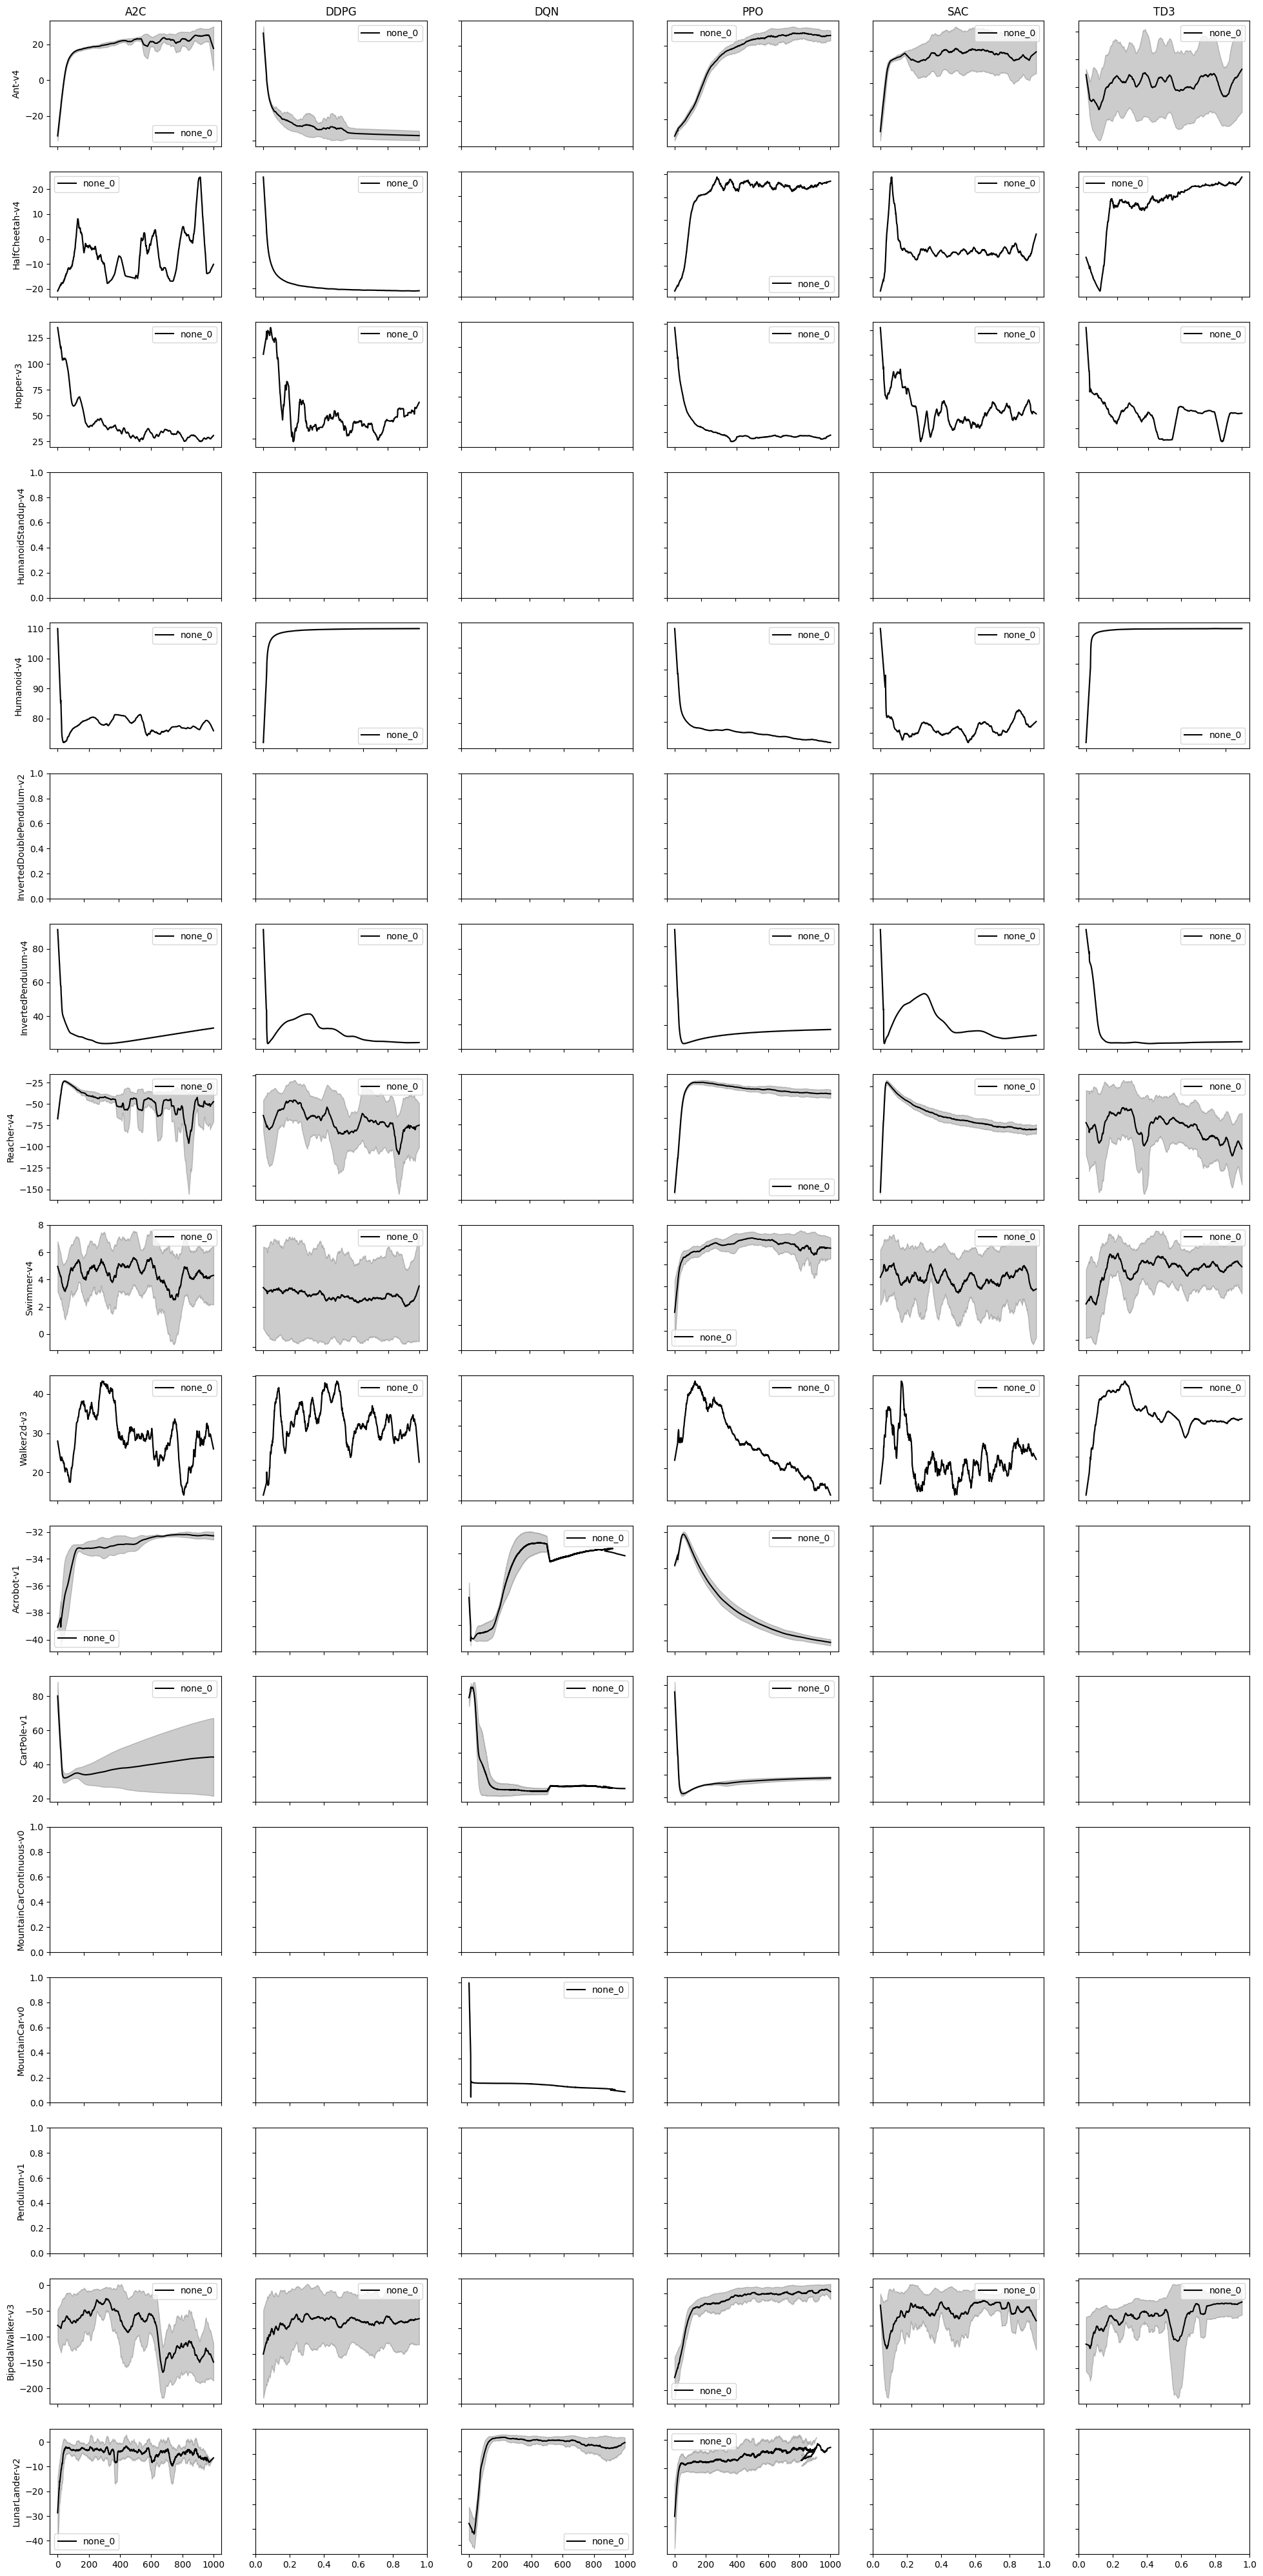

In [8]:
def grid_plot_base(N_policie = 6,M_envs = 16,fek=[0],fev=[0],index_plt=[11011,11012,11013,11014,11015],envs=utils.all_envs,policies=utils.all_policies):
    M_envs = len(envs)
    N_policie = len(policies)
    
    fig, axs = plt.subplots(M_envs, N_policie, figsize=(N_policie*4,M_envs*3))
    for i,policy in enumerate(policies[:N_policie]):
        axs[0,i].set_title(policy["name"])  
    for ax in axs.flat:
        #ax.set(xlabel='timestep', ylabel='reward')
        ax.label_outer()

    for i,ax in enumerate(axs[:,0].flat):
        ax.set(ylabel=envs[i]["env"])

    for i in range(N_policie):
        for j in range(M_envs):
            for k in fek:
                for l in fev:  
                    if l < len(utils.all_feature_extractor[k]["order"]) :
                        if k==0:
                            plot_one_file(
                                axs[j,i],i,j,k,l,
                                label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),
                                color="#000",
                                index=index_plt,
                                envs=envs,
                                policies=policies
                                )
                        else:
                            plot_one_file(
                                axs[j,i],i,j,k,l,
                                label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),
                                index=index_plt,
                                envs=envs,
                                policies=policies
                                )

grid_plot_base()


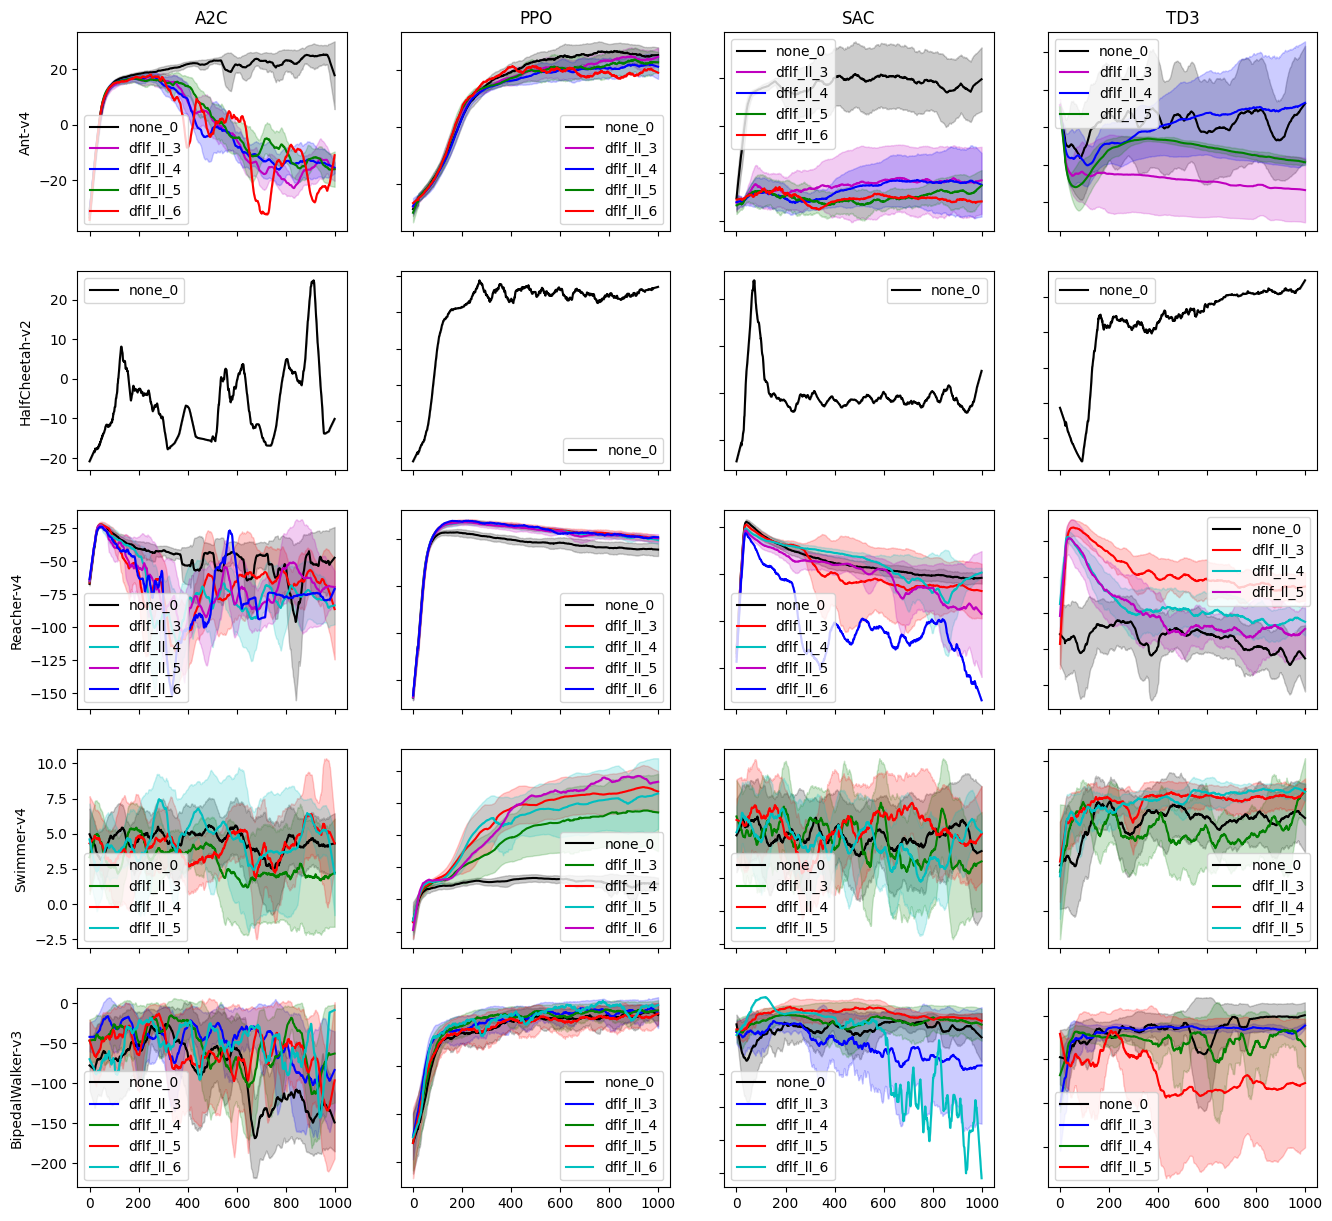

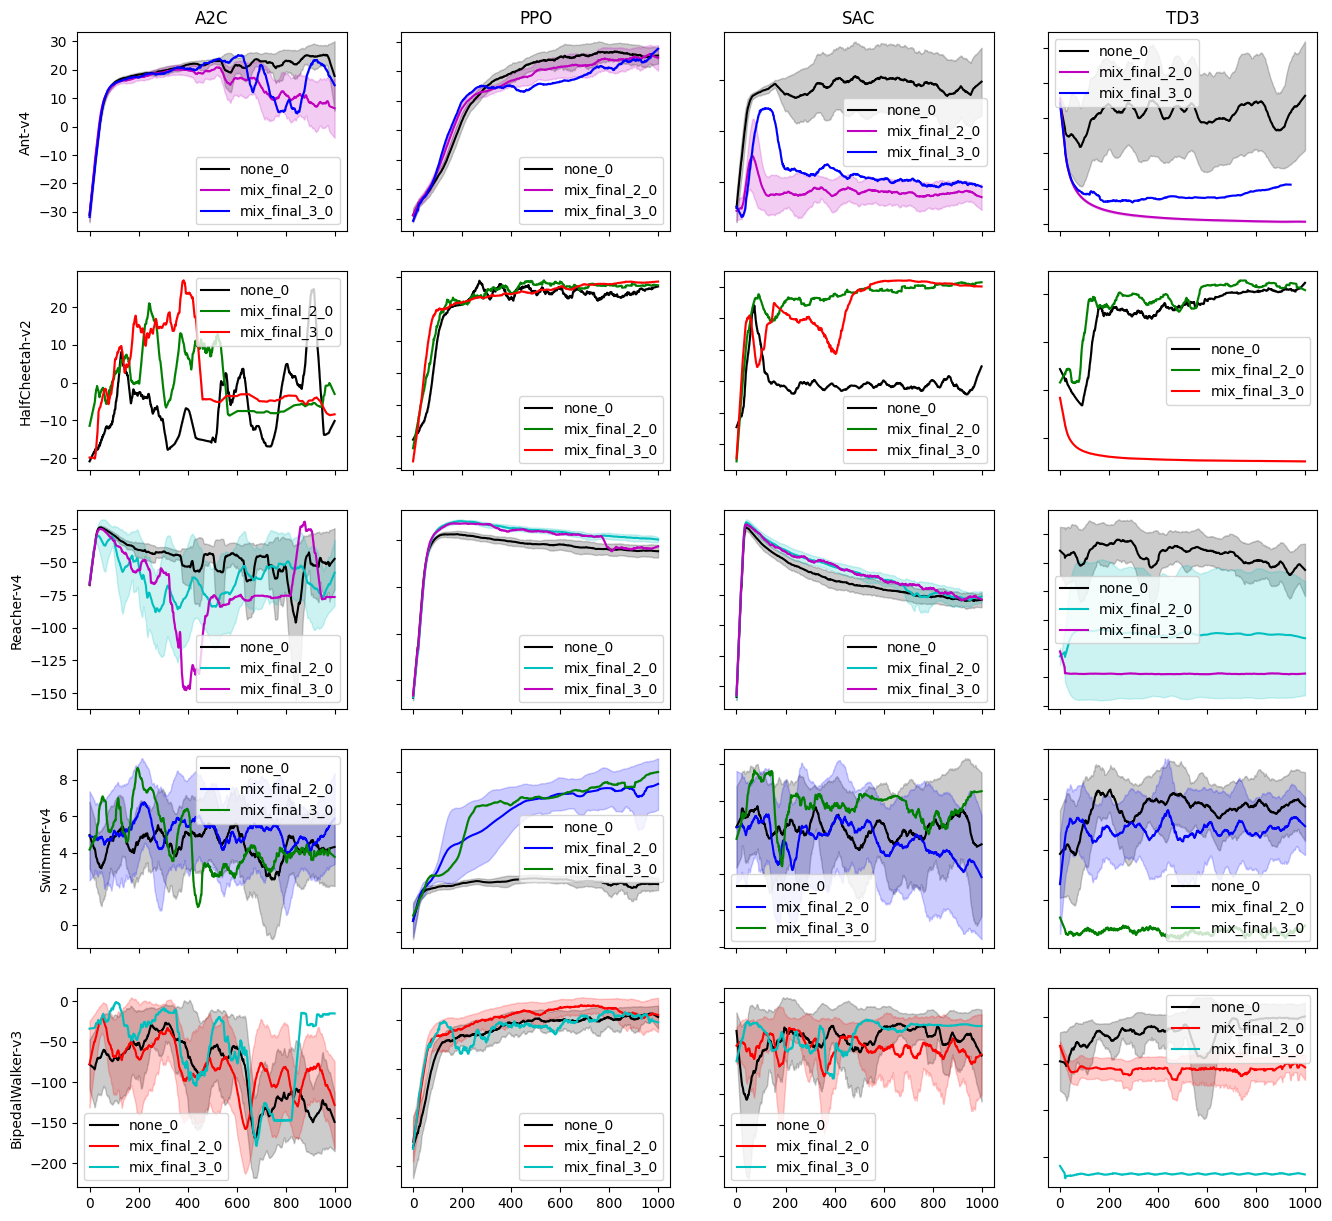

In [11]:
grid_plot_base(envs=utils.all_envs_robotics,policies=utils.all_policies_robotics,fek=[0,2],fev=[0,1,2,3])
grid_plot_base(envs=utils.all_envs_robotics,policies=utils.all_policies_robotics,fek=[0,167,168,169],fev=[0,1,2,3])

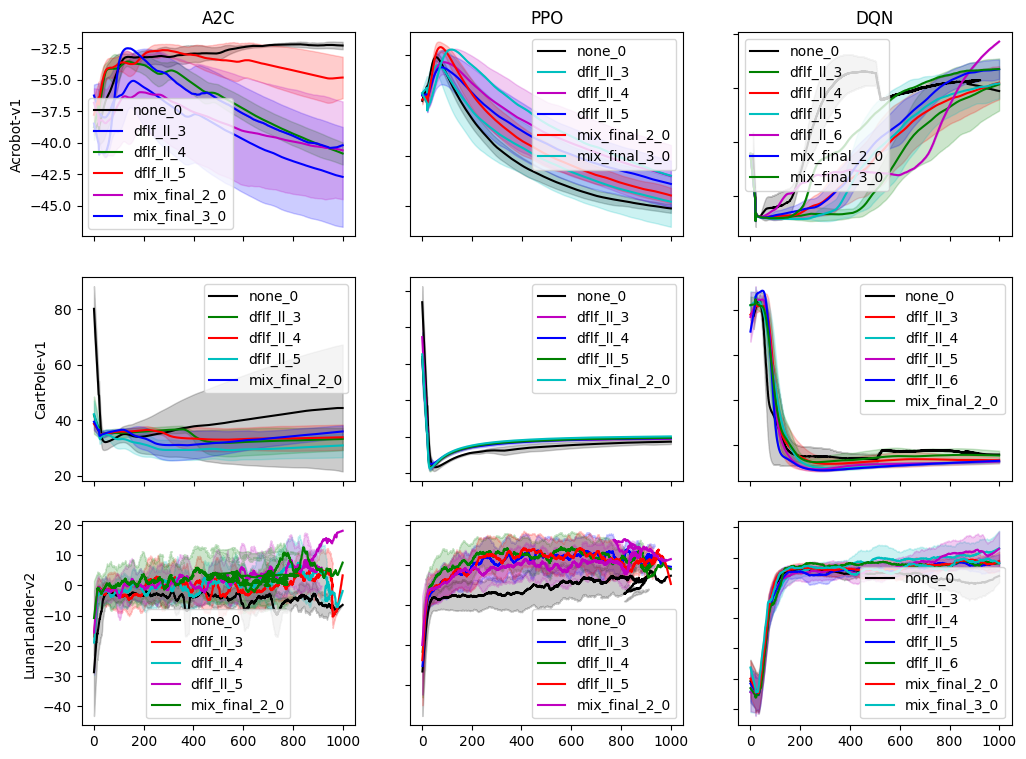

In [10]:
grid_plot_base(envs=utils.all_envs_discrete,policies=utils.all_policies_discrete,fek=[0,2,168,169],fev=[0,1,2,3])